In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_customer = pd.read_csv("/Users/minji/fastprojects/open/Customer_info.csv")
df_discount = pd.read_csv("/Users/minji/fastprojects/open/Discount_info.csv")
df_marketing = pd.read_csv("/Users/minji/fastprojects/open/Marketing_info.csv")
df_onlinesales = pd.read_csv("/Users/minji/fastprojects/open/Onlinesales_info.csv")
df_tax = pd.read_csv("/Users/minji/fastprojects/open/Tax_info.csv")

In [113]:
df_customer.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [114]:
df_discount.head()

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [72]:
df_customer.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [115]:
df_marketing.head() 

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [116]:
df_onlinesales.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [117]:
df_tax.head()

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [118]:
df_customer.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [73]:
print("데이터 크기:", df_customer.shape)

데이터 크기: (1468, 4)


In [ ]:
print(df_customer.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    1468 non-null   object
 1   성별      1468 non-null   object
 2   고객지역    1468 non-null   object
 3   가입기간    1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB
None


In [75]:
print(df_customer.isnull().sum())

고객ID    0
성별      0
고객지역    0
가입기간    0
dtype: int64


In [76]:
print(df_customer.describe())

              가입기간
count  1468.000000
mean     25.912125
std      13.959667
min       2.000000
25%      14.000000
50%      26.000000
75%      38.000000
max      50.000000


In [77]:
print(df_customer.describe(include='object'))

             고객ID    성별        고객지역
count        1468  1468        1468
unique       1468     2           5
top     USER_1358     여  California
freq            1   934         464


In [78]:
print("성별별 평균 가입기간:")
print(df_customer.groupby('성별')['가입기간'].mean())


성별별 평균 가입기간:
성별
남    26.329588
여    25.673448
Name: 가입기간, dtype: float64


In [79]:
print("\n지역별 평균 가입기간:")
print(df_customer.groupby('고객지역')['가입기간'].mean())


지역별 평균 가입기간:
고객지역
California       26.122845
Chicago          26.228070
New Jersey       24.328859
New York         26.070988
Washington DC    25.146667
Name: 가입기간, dtype: float64


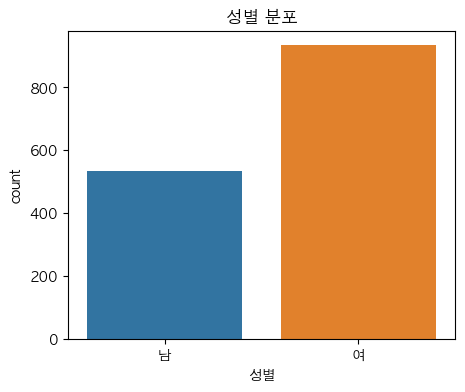

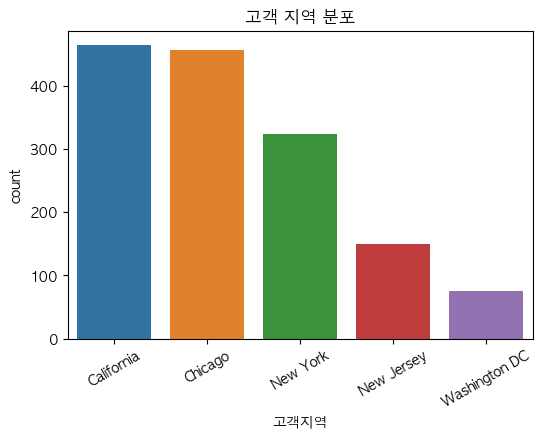

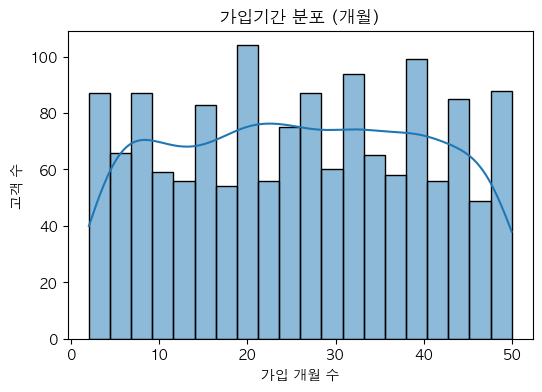

In [80]:
# 한글 깨짐 방지 (Mac 기준 - AppleGothic 설치된 경우)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 성별 분포
plt.figure(figsize=(5,4))
sns.countplot(data=df_customer, x='성별')
plt.title('성별 분포')
plt.show()

# 2. 고객 지역 분포
plt.figure(figsize=(6,4))
sns.countplot(data=df_customer, x='고객지역', order=df_customer['고객지역'].value_counts().index)
plt.title('고객 지역 분포')
plt.xticks(rotation=30)
plt.show()

# 3. 가입기간 히스토그램
plt.figure(figsize=(6,4))
sns.histplot(data=df_customer, x='가입기간', bins=20, kde=True)
plt.title('가입기간 분포 (개월)')
plt.xlabel('가입 개월 수')
plt.ylabel('고객 수')
plt.show()


In [81]:
# =============================
# 📝 Customer_info.csv EDA 요약
# =============================

# ✅ 데이터 개요
# - 총 고객 수: 1,468명
# - 변수: 고객ID, 성별, 고객지역, 가입기간 (월 단위)

# ✅ 결측치 없음
# - 모든 컬럼에 결측치 없음 (df.isnull().sum() 결과 0)

# ✅ 범주형 컬럼 요약
# - 성별: 여성(934명, 약 64%) > 남성(534명)
# - 고객지역: 5개 지역 (California, Chicago, New York, New Jersey, Washington DC)
#   - 가장 많은 지역: California (464명)

# ✅ 수치형 컬럼 요약 (가입기간)
# - 평균: 약 26개월 / 중앙값: 26개월
# - 범위: 2 ~ 50개월
# - 정규분포 형태에 가까움 (왜도 거의 없음)

# ✅ 시각화 분석
# - 성별, 고객지역: countplot 시각화 → 불균형 확인
# - 가입기간: 히스토그램 + KDE → 다양한 가입 분포 확인

# ✅ 그룹별 통계
# - 성별별 가입기간 평균: 여성이 남성보다 약간 더 길게 유지
# - 지역별 가입기간 평균: 지역 간 소폭 차이 존재

# ✅ 주요 인사이트
# - 여성 고객 비율 높음 → 타겟 분석 필요
# - 특정 지역(California)에 고객 집중
# - 전체적으로 고르게 분포된 가입기간 → 아웃라이어 없음

# =============================


In [82]:
df_onlinesales.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [ ]:
print("데이터 크기:", df_onlinesales.shape) 

데이터 크기: (52924, 9)


In [84]:
print(df_onlinesales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB
None


In [85]:
print(df_onlinesales.describe())

                 수량          평균금액           배송료
count  52924.000000  52924.000000  52924.000000
mean       4.497638     52.237646     10.517630
std       20.104711     64.006882     19.475613
min        1.000000      0.390000      0.000000
25%        1.000000      5.700000      6.000000
50%        1.000000     16.990000      6.000000
75%        2.000000    102.130000      6.500000
max      900.000000    355.740000    521.360000


In [86]:
print(df_onlinesales.isnull().sum())

고객ID      0
거래ID      0
거래날짜      0
제품ID      0
제품카테고리    0
수량        0
평균금액      0
배송료       0
쿠폰상태      0
dtype: int64


In [87]:
print(df_onlinesales['제품카테고리'].value_counts())
print(df_onlinesales['쿠폰상태'].value_counts())


Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Fun                       160
Gift Cards                159
Housewares                122
Google                    105
Backpacks                  89
More Bags                  46
Android                    43
Name: 제품카테고리, dtype: int64
Clicked     26926
Used        17904
Not Used     8094
Name: 쿠폰상태, dtype: int64


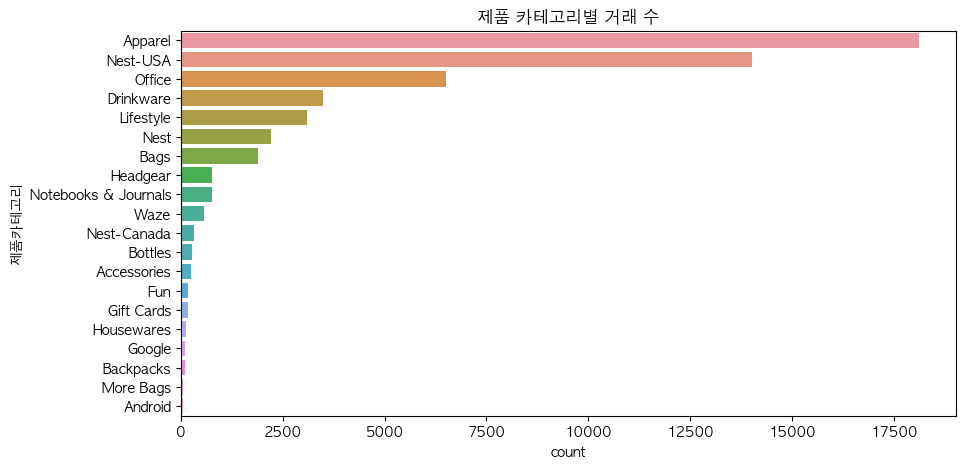

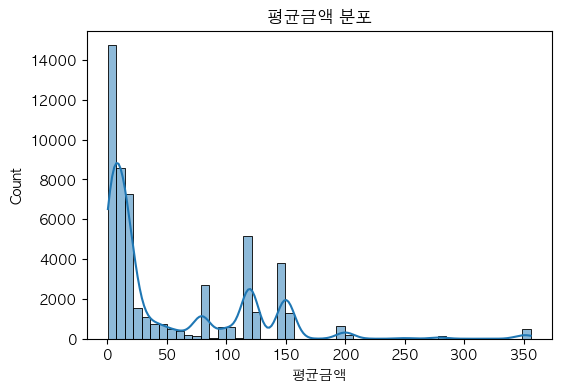

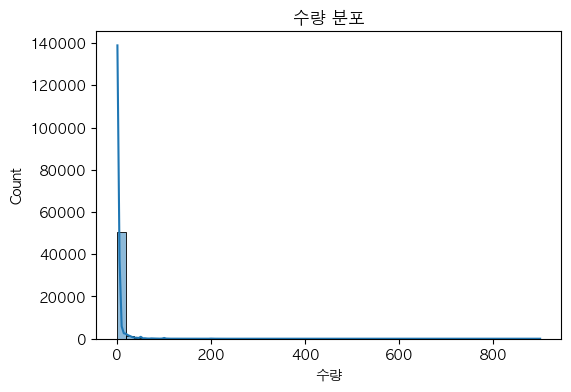

In [88]:
# 제품카테고리 분포
plt.figure(figsize=(10,5))
sns.countplot(data=df_onlinesales, y='제품카테고리', order=df_onlinesales['제품카테고리'].value_counts().index)
plt.title('제품 카테고리별 거래 수')
plt.show()

# 평균금액 히스토그램
plt.figure(figsize=(6,4))
sns.histplot(df_onlinesales['평균금액'], bins=50, kde=True)
plt.title('평균금액 분포')
plt.show()

# 수량 히스토그램
plt.figure(figsize=(6,4))
sns.histplot(df_onlinesales['수량'], bins=50, kde=True)
plt.title('수량 분포')
plt.show()


In [89]:
# 카테고리별 평균금액
df_onlinesales.groupby('제품카테고리')['평균금액'].mean().sort_values(ascending=False)

# 쿠폰상태별 평균금액
df_onlinesales.groupby('쿠폰상태')['평균금액'].mean()


쿠폰상태
Clicked     52.393139
Not Used    52.603737
Used        51.838298
Name: 평균금액, dtype: float64

In [90]:
# 카테고리별 평균금액
df_onlinesales.groupby('제품카테고리')['평균금액'].mean().sort_values(ascending=False)

# 쿠폰상태별 평균금액
df_onlinesales.groupby('쿠폰상태')['평균금액'].mean()


쿠폰상태
Clicked     52.393139
Not Used    52.603737
Used        51.838298
Name: 평균금액, dtype: float64

In [91]:
# =============================
# 📝 Onlinesales_info.csv EDA 요약
# =============================

# ✅ 데이터 개요
# - 총 거래 수: 52,924건
# - 변수: 고객ID, 거래ID, 거래날짜, 제품ID, 제품카테고리, 수량, 평균금액, 배송료, 쿠폰상태

# ✅ 결측치 없음
# - 모든 컬럼에서 결측치 없음

# ✅ 주요 범주형 변수
# - 고객ID: 1,468명 (Customer_info.csv와 동일)
# - 거래ID: 약 25,061개 → 하나의 거래에 여러 제품 포함 가능
# - 제품ID: 1,145종 / 제품카테고리: 20개 → 가장 많은 카테고리: Apparel (18,126건)
# - 쿠폰상태: 3종류 (Clicked, Used, Not Used) → Clicked 비중 가장 높음

# ✅ 수치형 변수 요약
# - 수량: 평균 4.5개, 최대 900개 (→ 극단값 확인 필요)
# - 평균금액: 평균 약 52.2원, 중앙값 16.9원 → 고가/저가 혼재
# - 배송료: 대부분 6~6.5원, 최대 521.36원 → 일부 이상치 존재 가능

# ✅ 주요 인사이트
# - 동일 고객이 여러 번 거래 → 고객 행동 분석 가능
# - Apparel 카테고리가 압도적으로 많음 → 주요 상품군
# - 배송료와 수량 변수는 극단값(outlier) 확인 필요
# - 쿠폰 상태(Clicked/Used 등)를 통한 고객 반응 분석 가능

# =============================


In [92]:
df_marketing.head()

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [93]:
print("데이터 크기:", df_marketing.shape)

데이터 크기: (365, 3)


In [94]:
print(df_marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      365 non-null    object 
 1   오프라인비용  365 non-null    int64  
 2   온라인비용   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB
None


In [95]:
print(df_marketing.isnull().sum())

날짜        0
오프라인비용    0
온라인비용     0
dtype: int64


In [ ]:
print(df_marketing.describe)

<bound method NDFrame.describe of              날짜  오프라인비용    온라인비용
0    2019-01-01    4500  2424.50
1    2019-01-02    4500  3480.36
2    2019-01-03    4500  1576.38
3    2019-01-04    4500  2928.55
4    2019-01-05    4500  4055.30
..          ...     ...      ...
360  2019-12-27    4000  3396.87
361  2019-12-28    4000  3246.84
362  2019-12-29    4000  2546.58
363  2019-12-30    4000   674.31
364  2019-12-31    4000  2058.75

[365 rows x 3 columns]>


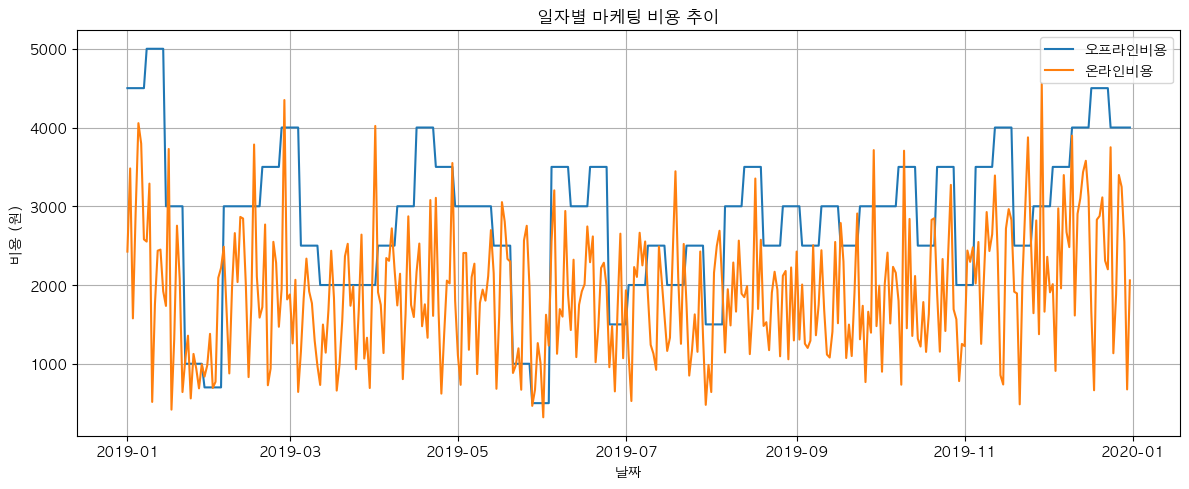

In [97]:
# 날짜 타입 변환
df_marketing['날짜'] = pd.to_datetime(df_marketing['날짜'])

# 마케팅 비용 추이 그래프
plt.figure(figsize=(12, 5))
plt.plot(df_marketing['날짜'], df_marketing['오프라인비용'], label='오프라인비용')
plt.plot(df_marketing['날짜'], df_marketing['온라인비용'], label='온라인비용')
plt.title('일자별 마케팅 비용 추이')
plt.xlabel('날짜')
plt.ylabel('비용 (원)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [98]:
# =============================
# 📝 Marketing_info.csv EDA 요약
# =============================

# ✅ 데이터 개요
# - 총 행 수: 365개 (1년치 일자 데이터)
# - 컬럼: 날짜, 오프라인비용, 온라인비용

# ✅ 컬럼 설명
# - 날짜: 마케팅 집행 일자 (2019년 기준)
# - 오프라인비용: 하루 단위 오프라인 광고비 (int)
# - 온라인비용: 하루 단위 온라인 광고비 (float)

# ✅ 결측치 없음
# - 모든 컬럼 결측치 없음

# ✅ 수치형 통계
# - 오프라인비용 평균: 약 2,844원 (min: 500, max: 5,000)
# - 온라인비용 평균: 약 1,906원 (min: 320, max: 4,556)
# - 온라인비용의 분산이 더 큼 → 마케팅 성격이 유동적일 수 있음

# ✅ 주요 인사이트
# - 날짜별로 오프라인/온라인 비용이 분리되어 있음
# - 고객 ID 없음 → 개별 고객과 직접 연결은 불가
# - 대신 거래 데이터(온/오프라인 매출)와 날짜 기준으로 연결 가능

# =============================


In [99]:
df_discount.head()

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [100]:
print("데이터 크기:", df_discount.shape) 

데이터 크기: (204, 4)


In [101]:
print(df_discount.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       204 non-null    object
 1   제품카테고리  204 non-null    object
 2   쿠폰코드    204 non-null    object
 3   할인율     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB
None


In [102]:
print(df_discount.isnull().sum())

월         0
제품카테고리    0
쿠폰코드      0
할인율       0
dtype: int64


In [104]:
print(df_discount.describe)

<bound method NDFrame.describe of        월                제품카테고리    쿠폰코드  할인율
0    Jan               Apparel  SALE10   10
1    Feb               Apparel  SALE20   20
2    Mar               Apparel  SALE30   30
3    Jan              Nest-USA  ELEC10   10
4    Feb              Nest-USA  ELEC20   20
..   ...                   ...     ...  ...
199  Nov  Notebooks & Journals    NJ20   20
200  Dec  Notebooks & Journals    NJ30   30
201  Oct               Android   AND10   10
202  Nov               Android   AND20   20
203  Dec               Android   AND30   30

[204 rows x 4 columns]>


In [105]:
# =============================
# 📝 Discount_info.csv EDA 요약
# =============================

# ✅ 데이터 개요
# - 총 행 수: 204건 (월별/카테고리별 쿠폰 정보)
# - 컬럼: 월, 제품카테고리, 쿠폰코드, 할인율

# ✅ 컬럼 설명
# - 월: 할인 적용 시점 (Jan ~ Dec)
# - 제품카테고리: 할인 대상 카테고리 (총 17종)
# - 쿠폰코드: 고유한 쿠폰 이름 (SALE10, EXTRA10 등 총 48종)
# - 할인율: 퍼센트(%) 단위 할인율 (10, 20, 30만 존재)

# ✅ 결측치 없음
# - 모든 컬럼에서 결측치 없음

# ✅ 수치 요약 (할인율)
# - 평균 할인율: 20%
# - 최소/최대: 10% ~ 30%
# - 할인율 종류는 10/20/30으로 제한되어 있음 → 범주형 처리 가능

# ✅ 주요 인사이트
# - 매월 각 카테고리에 여러 개의 쿠폰이 적용됨
# - 특정 카테고리는 할인율을 다양하게 운영 (Apparel, Nest-USA 등)
# - Onlinesales_info의 '제품카테고리' + '월'과 기준을 맞추면 연결 가능

# =============================


In [106]:
df_tax.head()

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [107]:
print("데이터 크기:", df_tax.shape) 

데이터 크기: (20, 2)


In [108]:
print(df_tax.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품카테고리  20 non-null     object 
 1   GST     20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes
None


In [109]:
print(df_tax.isnull().sum())

제품카테고리    0
GST       0
dtype: int64


In [110]:
print(df_tax.describe)

<bound method NDFrame.describe of                   제품카테고리   GST
0               Nest-USA  0.10
1                 Office  0.10
2                Apparel  0.18
3                   Bags  0.18
4              Drinkware  0.18
5              Lifestyle  0.18
6   Notebooks & Journals  0.05
7               Headgear  0.05
8                   Waze  0.18
9                    Fun  0.18
10           Nest-Canada  0.10
11             Backpacks  0.10
12                Google  0.10
13               Bottles  0.05
14            Gift Cards  0.05
15             More Bags  0.18
16            Housewares  0.12
17               Android  0.10
18           Accessories  0.10
19                  Nest  0.05>


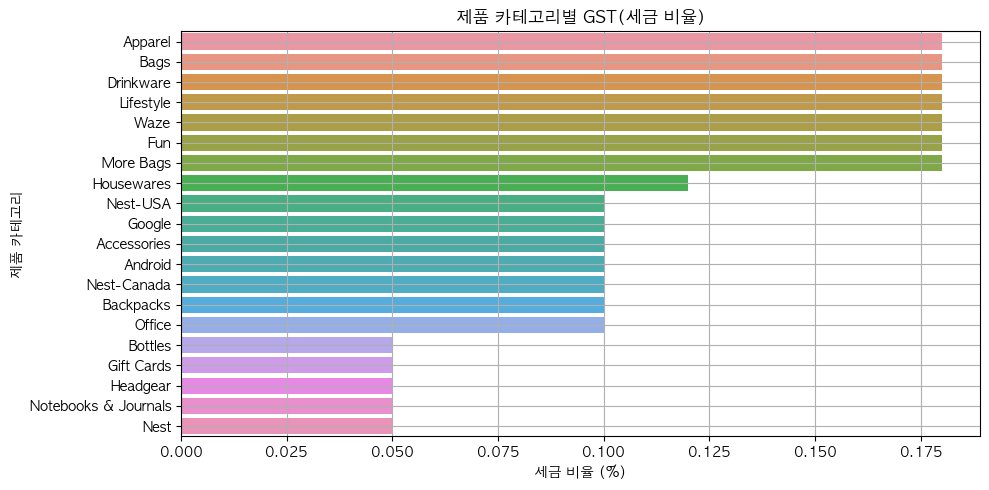

In [111]:
# 시각화
plt.figure(figsize=(10, 5))
sns.barplot(data=df_tax, y='제품카테고리', x='GST', order=df_tax.sort_values('GST', ascending=False)['제품카테고리'])
plt.title('제품 카테고리별 GST(세금 비율)')
plt.xlabel('세금 비율 (%)')
plt.ylabel('제품 카테고리')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 